In [1]:
import matplotlib.pyplot as plt


In [2]:
colores = ['Amarillo', 'Verde', 'Morado' , 'Azul']

cantidades =[12, 8, 22, 16]

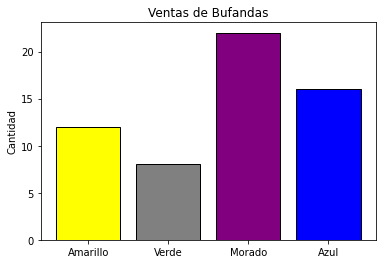

In [7]:
# Creamos el gráfico Diagrama de barras( Bar PLot)

colors = ['yellow', 'gray','purple','blue']
plt.bar(colores, cantidades, edgecolor ='black', color = colors)
plt.title('Ventas de Bufandas')
plt.ylabel('Cantidad')
plt.show()

In [8]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

In [9]:
import pandas as pd

In [11]:
data  = pd.read_csv('StudentsPerformance.csv')

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
tabla_gender = data['gender']

In [15]:
tabla_gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
table_math_score = data['math score'].value_counts()

In [17]:
table_math_score

65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64

In [18]:
x = [77, 18, 63, 84, 34, 59, 59, 54, 56, 36, 26, 34, 44,
        41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 65, 51, 62, 60, 68, 45, 65, 83, 71, 63, 58, 61]

In [21]:
k = 7

val_min = min(x)
val_max = max(x)

In [20]:
print(val_max, val_min)

84 18


In [22]:
A  = (val_max - val_min ) / k

In [23]:
print(A)

9.428571428571429
